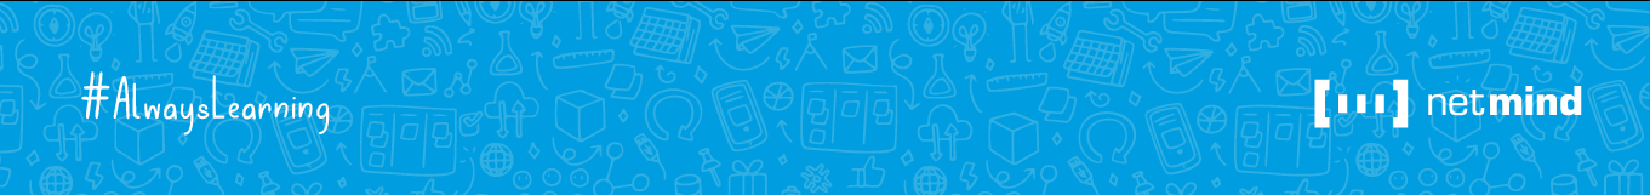
# **Recursos de datos**

Como científico de datos, queremos centrarse en el entrenamiento de modelos de Machine Learning. 
- Aunque necesita acceso a los datos como entrada para un modelo de Machine Learning, no quiere preocuparse por cómo obtener acceso. 
- Para simplificar el acceso a los datos con los que desea trabajar, puede usar recursos de datos.

## **Descripción de los recursos de datos**
En Azure Machine Learning, los recursos de datos son referencias a dónde se almacenan los datos, cómo obtener acceso y cualquier otro metadato pertinente. Puede crear recursos de datos para obtener acceso a los datos en almacenes de datos, servicios de almacenamiento de Azure, direcciones URL públicas o datos almacenados en el dispositivo local.

Las ventajas de usar recursos de datos son las siguientes:

- Puede compartir y reutilizar datos con otros miembros del equipo de forma que no necesiten recordar ubicaciones de archivos.
- Puede acceder sin problemas a los datos durante el entrenamiento del modelo (en cualquier tipo de proceso admitido) sin preocuparse por las cadenas de conexión o las rutas de acceso de datos.
- Puede crear una versión de los metadatos del recurso de datos.

Hay tres tipos principales de recursos de datos que puede usar:

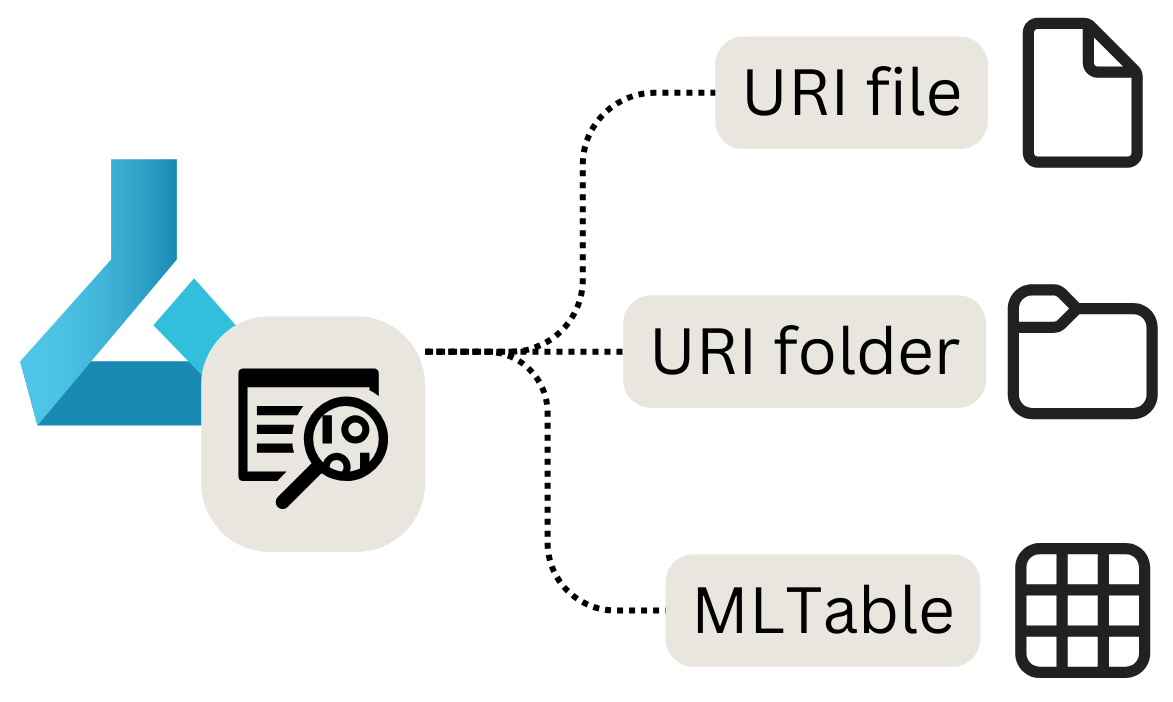

## **Creación de un recurso de datos de archivo URI**
Un recurso de datos de archivo URI apunta a un archivo específico. Azure Machine Learning solo almacena la ruta de acceso al archivo, lo que significa que puede apuntar a cualquier tipo de archivo. Al usar el recurso de datos, especifique cómo desea leer los datos, lo que depende del tipo de datos al que se conecte.

In [ ]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

my_path = '<supported-path>'

my_data = Data(
    path=my_path,
    type=AssetTypes.URI_FILE,
    description="<description>",
    name="<name>",
    version="<version>"
)

ml_client.data.create_or_update(my_data)

Para leer los datos:

In [ ]:
import argparse
import pandas as pd

parser = argparse.ArgumentParser()
parser.add_argument("--input_data", type=str)
args = parser.parse_args()

df = pd.read_csv(args.input_data)
print(df.head(10))

## **Creación de un recurso de datos de carpeta URI**
Un recurso de datos de carpeta URI apunta a una carpeta específica. Funciona de forma similar a un recurso de datos de archivo URI y admite las mismas rutas de acceso.

In [ ]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

my_path = '<supported-path>'

my_data = Data(
    path=my_path,
    type=AssetTypes.URI_FOLDER,
    description="<description>",
    name="<name>",
    version='<version>'
)

ml_client.data.create_or_update(my_data)

Leer todos los archivos CSV de la carpeta y concatenarlos; puede hacerlo mediante la inclusión del código siguiente en el script de Python:

In [ ]:
import argparse
import glob
import pandas as pd

parser = argparse.ArgumentParser()
parser.add_argument("--input_data", type=str)
args = parser.parse_args()

data_path = args.input_data
all_files = glob.glob(data_path + "/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files), sort=False)

## **Creación de un recurso de datos de MLTable**
- Un recurso de datos de MLTable permite apuntar a datos tabulares. 
    - Al crear un recurso de datos de MLTable, se especifica la definición de esquema para leer los datos. 
    - Como el esquema ya está definido y almacenado con el recurso de datos, no es necesario especificar cómo leer los datos al usarlo.

- Por lo tanto, se debe usar un recurso de datos MLTable cuando el esquema de los datos sea complejo o cambie con frecuencia. 
    - En lugar de cambiar cómo leer los datos en cada script que los usa, solo tiene que cambiarlos en el propio recurso de datos.

- Al definir el esquema al crear un recurso de datos de MLTable, también puede optar por especificar solo un subconjunto de los datos.

- Para determinadas características de Azure Machine Learning, como el aprendizaje automático automatizado, debe usar un recurso de datos de MLTable, ya que Azure Machine Learning debe saber cómo leer los datos.

Para definir el esquema, puede incluir un archivo MLTable en la misma carpeta que los datos que desea leer. El archivo MLTable incluye la ruta de acceso que apunta a los datos que desea leer y cómo leer los datos:

```yaml

type: mltable

paths:
  - pattern: ./*.txt
transformations:
  - read_delimited:
      delimiter: ','
      encoding: ascii
      header: all_files_same_headers
```

Para crear un recurso de datos de MLTable con el SDK de Python:

In [ ]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

my_path = '<path-including-mltable-file>'

my_data = Data(
    path=my_path,
    type=AssetTypes.MLTABLE,
    description="<description>",
    name="<name>",
    version='<version>'
)

ml_client.data.create_or_update(my_data)

Para leer los datos:

In [ ]:
import argparse
import mltable
import pandas

parser = argparse.ArgumentParser()
parser.add_argument("--input_data", type=str)
args = parser.parse_args()

tbl = mltable.load(args.input_data)
df = tbl.to_pandas_dataframe()

print(df.head(10))

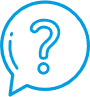
## **¿Preguntas?**